## Quantum Random Number Generator

Classical CPUs rely on deterministic algorithms like pseudo-random number generators (PRNGs), which are based on predictable seeds. In contrast, quantum computing leverages the inherent randomness of quantum mechanics—superposition and measurement—ensuring truly unpredictable and random results. This quantum randomness powers the generation of real random numbers in this project.

In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np 

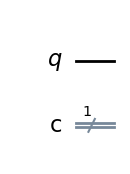

In [40]:
# Setup: Create a quantum register with 1 qubit
qr = QuantumRegister(1, name="q")

# Create a classical register to store the measurement outcome
cr = ClassicalRegister(1, name="c")

# Create a quantum circuit with the quantum and classical registers
qc = QuantumCircuit(qr, cr) 

# Draw the quantum circuit so far
qc.draw(output="mpl")

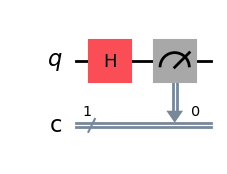

In [38]:
# Apply a Hadamard gate to create a superposition of 0 and 1
qc.h(qr[0])

# Measure the qubit and store the result in the classical register
qc.measure(qr, cr)

# Visualize the updated quantum circuit
qc.draw(output="mpl")

In [39]:
# Use the AerSimulator to simulate the quantum circuit
simulator = AerSimulator()

# Run the simulation with 100 shots to get the results
job = simulator.run(qc, shots=100)
result = job.result()

# Get the measurement results (counts of bitstrings)
counts = result.get_counts(qc)
print('Measurement Counts:', counts)
print("Random bit:", list(counts.keys())[0])

Measurement Counts: {'1': 50, '0': 50}
Random bit: 1


and more compact...

In [49]:
# Create a 1-qubit quantum circuit
qc = QuantumCircuit(1, 1)

# Put the qubit into superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Use AerSimulator
simulator = AerSimulator()

# Execute the circuit with 1 shot to get 1 random bit
job = simulator.run(qc, shots=1)
result = job.result()

# Get the random bit result
counts = result.get_counts()
print("Random bit:", list(counts.keys())[0])

Random bit: 1


### Expand it to a 10-qubit circuit

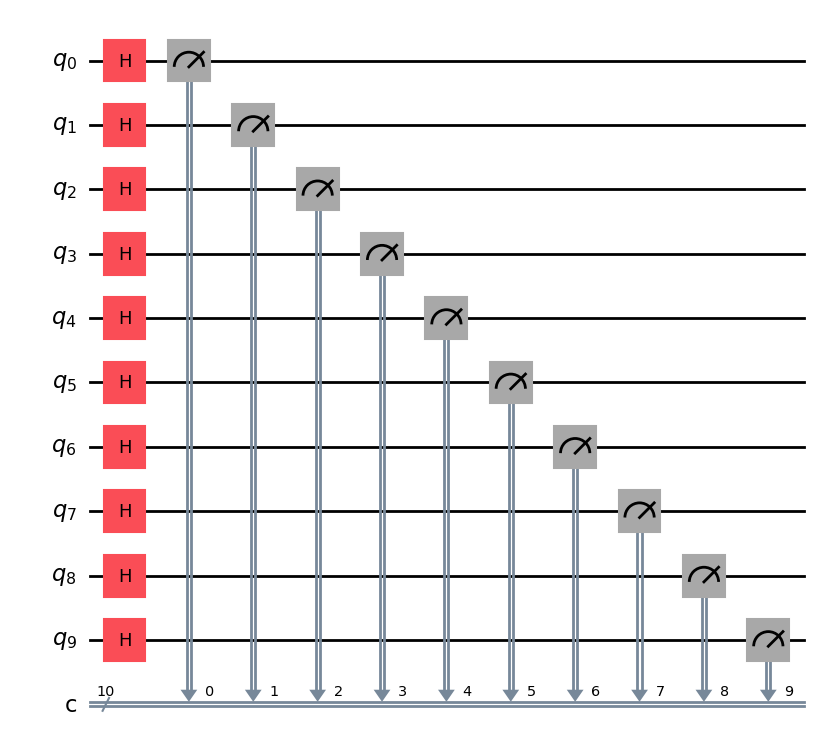

In [50]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

# Setup: Create a quantum register with 10 qubits and a classical register with 10 bits
qr = QuantumRegister(10, name='q')
cr = ClassicalRegister(10, name='c')

# Create a quantum circuit with the quantum and classical registers
qc = QuantumCircuit(qr, cr)

# Apply a Hadamard gate to each qubit to create a superposition
for qubit in range(10):
    qc.h(qr[qubit])

# Measure all qubits and store the result in the classical register
qc.measure(qr, cr)

# Visualize the quantum circuit
qc.draw(output="mpl")

In [51]:
# Use the AerSimulator to simulate the quantum circuit
simulator = AerSimulator()

# Run the simulation with 1 shot to get a random number
job = simulator.run(qc, shots=1000)
result = job.result()

# Get the binary result from the measurement
counts = result.get_counts()
binary_result = list(counts.keys())[0]
print(f"Quantum Value in Binary: {binary_result}")

# Convert the binary result to an integer (between 0 and 1023)
random_number = int(binary_result, 2)
print(f"Random Number (0-1023): {random_number}")

# Scale the result to be between 1 and 99 (modulo operation)
scaled_random_number = (random_number % 100) + 1
print(f"Scaled Random Number (1-99): {scaled_random_number}")

Quantum Value in Binary: 0110101010
Random Number (0-1023): 426
Scaled Random Number (1-99): 27


and more compact...

In [52]:
# Create a quantum circuit with 10 qubits to generate numbers from 0 to 1023
qc = QuantumCircuit(10, 10)

# Apply a Hadamard gate to each qubit
for qubit in range(10):
    qc.h(qubit)

# Measure all qubits and store the result in the classical register
qc.measure(range(10), range(10))

# Simulate the quantum circuit
simulator = AerSimulator()

# Run the simulation with 1 shot to get a random number
job = simulator.run(qc, shots=1)
result = job.result()

# Get the binary result from the measurement
counts = result.get_counts()
binary_result = list(counts.keys())[0]
print(f"Quantum Value in Binary: {binary_result}")

# Convert the binary result to an integer (between 0 and 1023)
random_number = int(binary_result, 2)
print(f"Random Number (0-1023): {random_number}")

# Scale the result to be between 1 and 99 (modulo operation)
scaled_random_number = (random_number % 100) + 1
print(f"Scaled Random Number (1-99): {scaled_random_number}")

Quantum Value in Binary: 1110100001
Random Number (0-1023): 929
Scaled Random Number (1-99): 30
